### Lab Assignment 4: Feature Selection and Engineering

##### Aim: To apply feature selection and feature engineering techniques on the Wine Quality dataset,improving data representation and model performance.

### Task 1: Load and Explore the Dataset

#### 1. Load the Wine Quality dataset using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### 2. Display dataset characteristics:

Number of records and features

In [3]:
df.shape

(1143, 13)

Data types of features (numerical, categorical)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Summary statistics (mean, median, standard deviation, etc.)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### 3. Check for missing values and outliers using visualization techniques.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

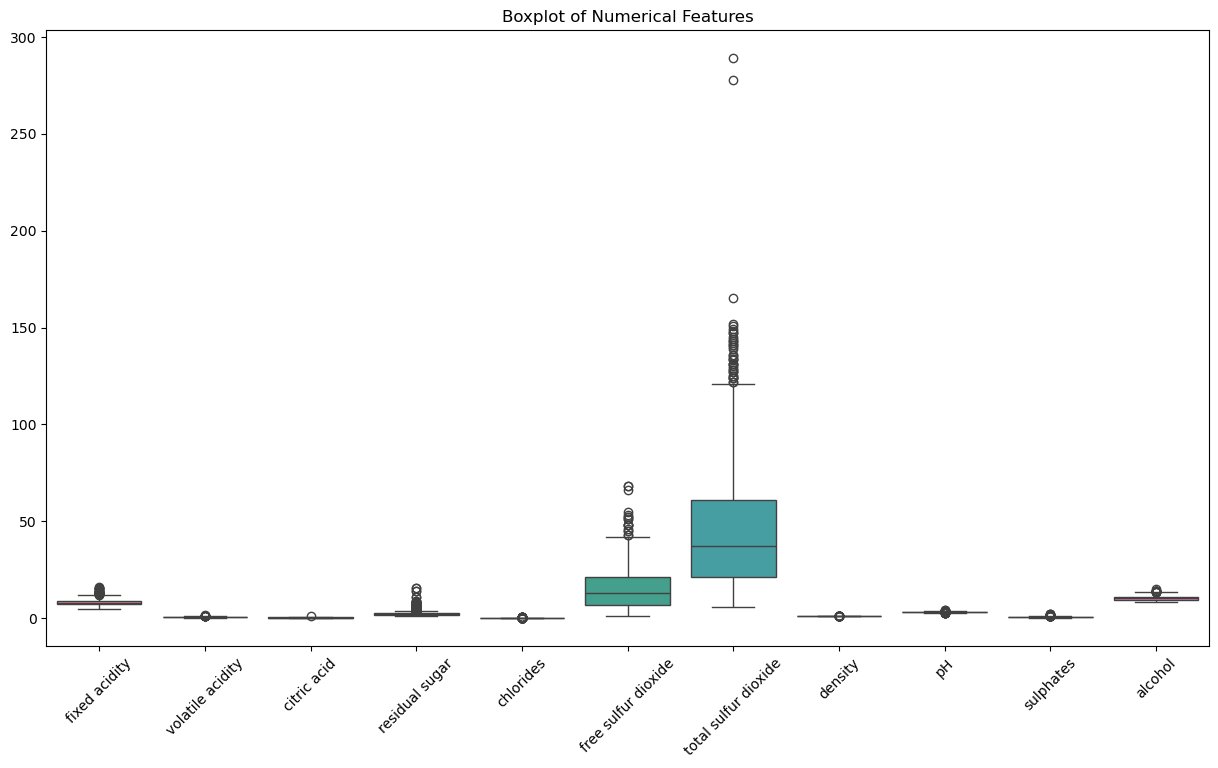

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["quality", "Id"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.savefig('boxplot_wine_features')
plt.show()

In [11]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df.drop(columns=["quality", "Id"])))

threshold = 3
df= df[(z_scores < threshold).all(axis=1)]
df.shape[0], df.shape[0]

(1046, 1046)

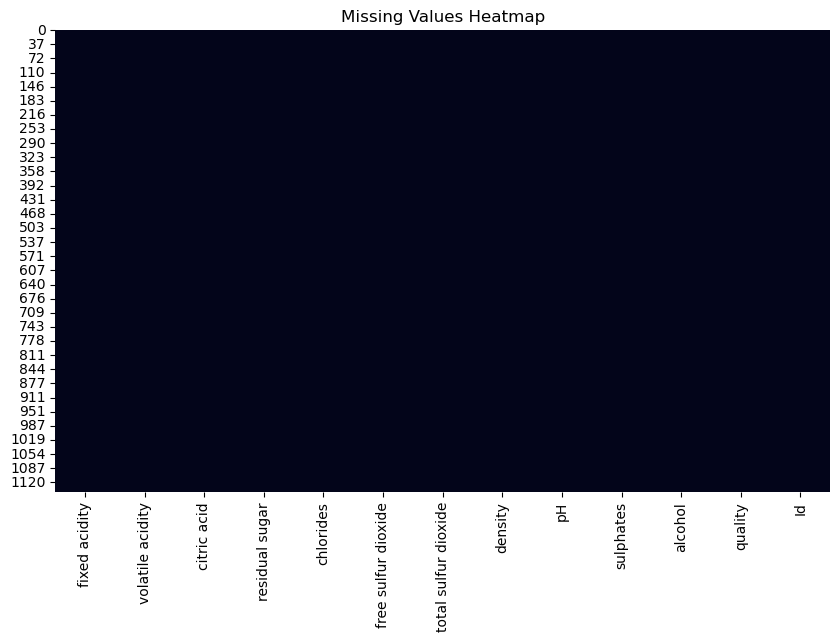

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### Task 2: Feature Engineering

#### 1. Create new features using existing attributes (e.g., acidity ratio, alcohol-to-sugar ratio).

In [13]:
df["acidity_ratio"] = df["fixed acidity"] / (df["volatile acidity"] + 1e-6)
df["alcohol_sugar_ratio"] = df["alcohol"] / (df["residual sugar"] + 1e-6)
df[["acidity_ratio", "alcohol_sugar_ratio"]].head()

,acidity_ratio,alcohol_sugar_ratio
0,10.571413,4.947366
1,8.863626,3.769229
2,10.263144,4.260868
3,39.999857,5.157892
4,10.571413,4.947366


#### 2. Transform variables if necessary (log transformation, polynomial features).

In [14]:
from scipy.stats import skew
skew = skew(df[['residual sugar','chlorides','sulphates']])
print("Skewness before log transformation:", skew)

Skewness before log transformation: [2.40027973 2.29757553 0.93074995]


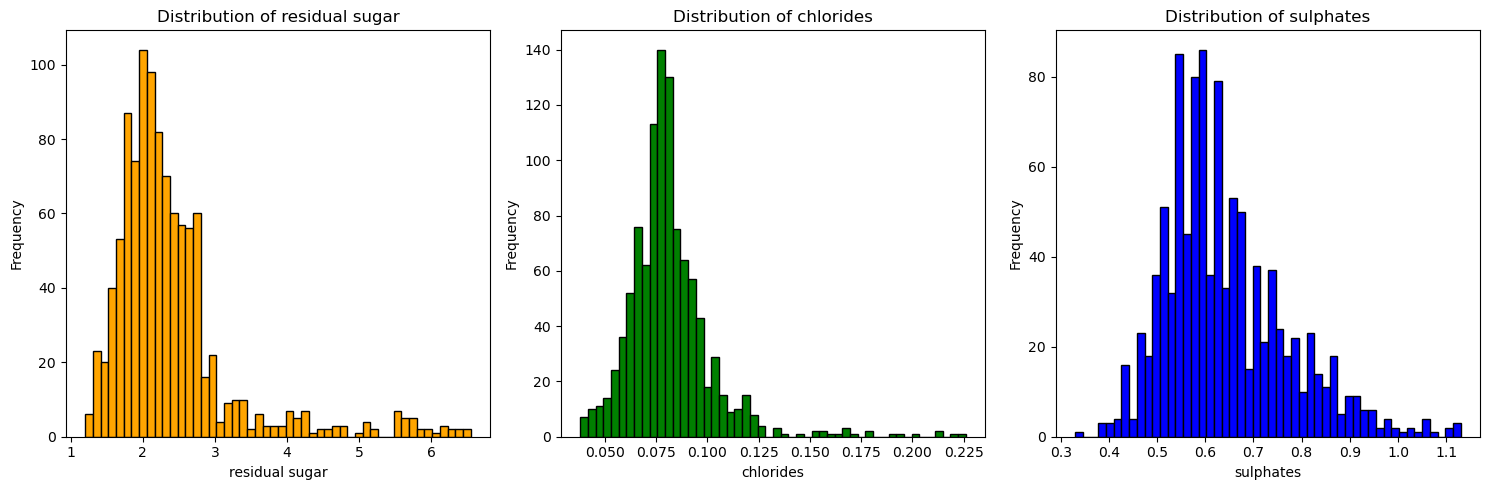

In [15]:
plt.figure(figsize=(15, 5)) 
features_to_check = ['residual sugar', 'chlorides', 'sulphates']
for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[feature], bins=50,edgecolor= 'black', color=['orange', 'green', 'blue'][i])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import skew
df['residual sugar'] = np.log1p(df['residual sugar'])
df['chlorides'] = np.log1p(df['chlorides'])
df['sulphates'] = np.log1p(df['sulphates'])
skew = skew(df[['residual sugar', 'chlorides', 'sulphates']], axis=0)
print("Skewness after log transformation:", skew)

Skewness after log transformation: [1.53533589 2.09656874 0.70504747]


#### 4. Scale numerical features using Min-Max Scaling or Standardization.

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['quality'], axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

### Task 3: Feature Selection Techniques

#### 1. Perform correlation analysis to remove redundant features.

In [19]:
corr = df_scaled.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,acidity_ratio
fixed acidity,1.000000,-0.296103,0.702582,0.223761,0.202696,-0.157769,-0.101157,0.679474,-0.702088,0.195451,-0.027529,-0.288801,0.631421,-0.252093
volatile acidity,-0.296103,1.000000,-0.585406,0.017748,0.082168,0.014647,0.113799,-0.016382,0.236152,-0.369031,-0.210519,-0.021459,-0.809985,-0.091506
citric acid,0.702582,-0.585406,1.000000,0.220552,0.112946,-0.073877,-0.005129,0.391348,-0.510792,0.309348,0.163378,-0.138957,0.709093,-0.171982
residual sugar,0.223761,0.017748,0.220552,1.000000,0.115223,-0.016488,0.079211,0.374175,-0.080343,0.050482,0.191696,-0.102994,0.064954,-0.890716
chlorides,0.202696,0.082168,0.112946,0.115223,1.000000,-0.045596,0.054816,0.336565,-0.190076,0.003918,-0.243626,-0.149510,-0.005043,-0.238177
free sulfur dioxide,-0.157769,0.014647,-0.073877,-0.016488,-0.045596,1.000000,0.656149,-0.068806,0.104649,0.021421,-0.059454,0.086491,-0.106510,-0.003364
total sulfur dioxide,-0.101157,0.113799,-0.005129,0.079211,0.054816,0.656149,1.000000,0.097285,0.004727,-0.067875,-0.248108,-0.134172,-0.166756,-0.182347
density,0.679474,-0.016382,0.391348,0.374175,0.336565,-0.068806,0.097285,1.000000,-0.318210,0.118182,-0.455651,-0.414208,0.257848,-0.572877
pH,-0.702088,0.236152,-0.510792,-0.080343,-0.190076,0.104649,0.004727,-0.318210,1.000000,-0.021407,0.161235,0.133967,-0.420568,0.143935
sulphates,0.195451,-0.369031,0.309348,0.050482,0.003918,0.021421,-0.067875,0.118182,-0.021407,1.000000,0.251752,-0.053924,0.376951,0.047917


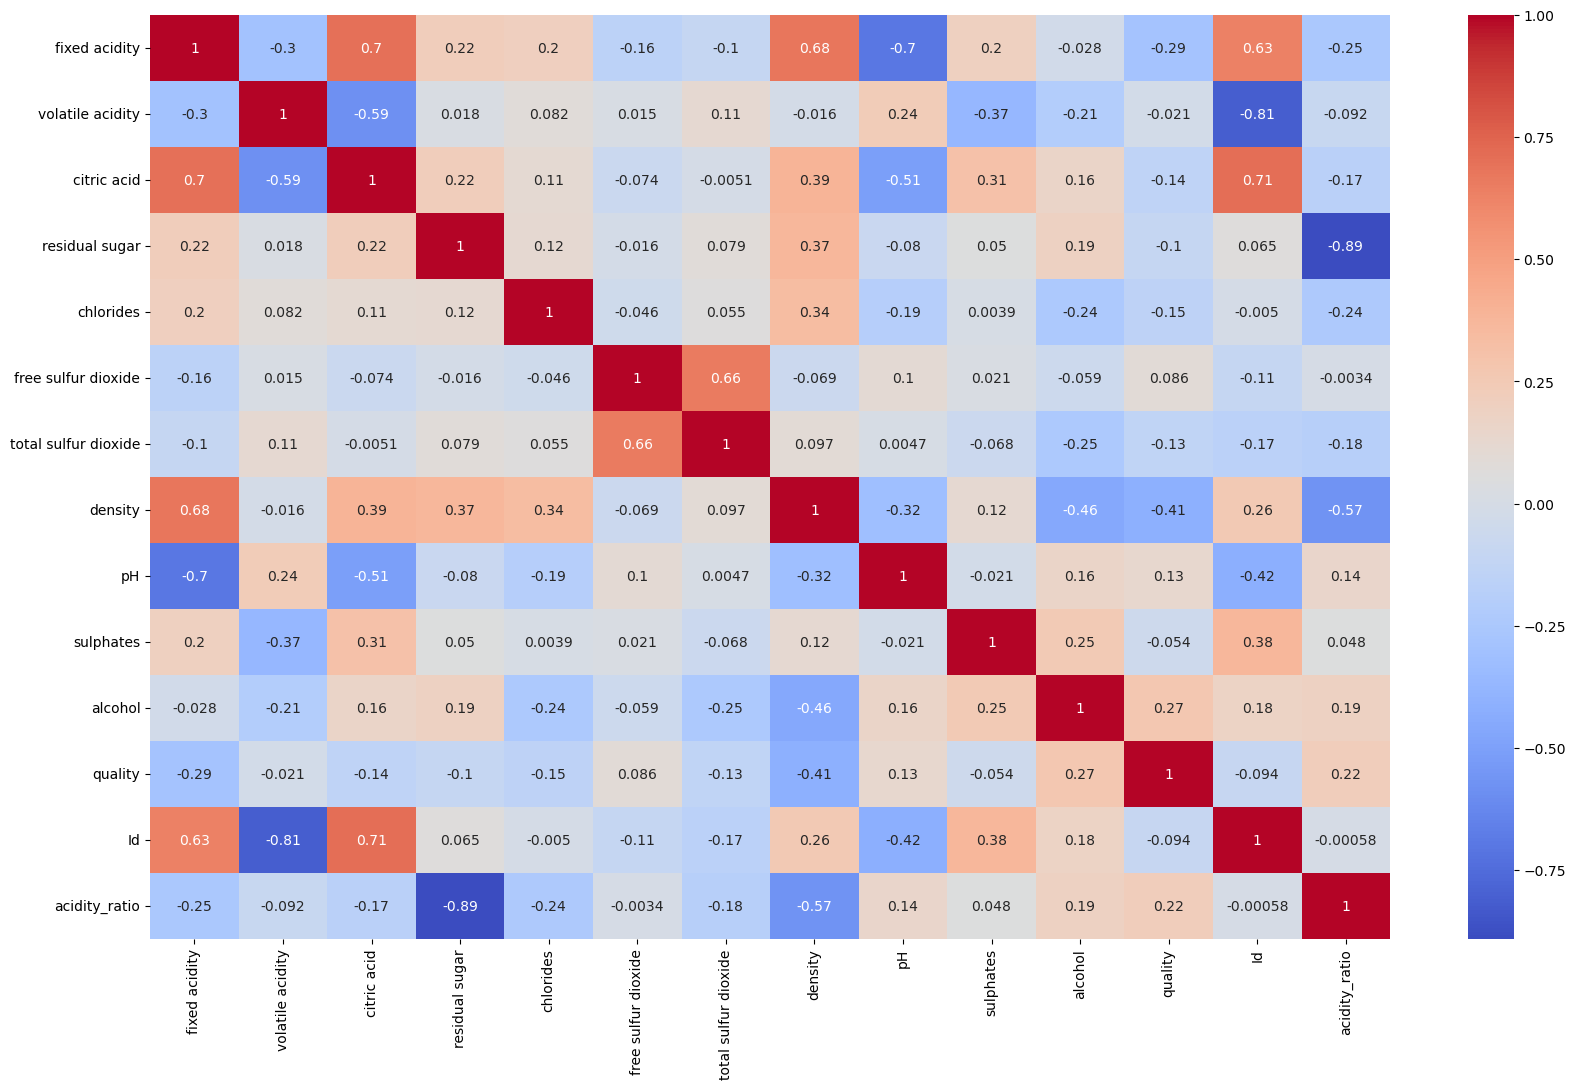

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap = 'coolwarm')
plt.savefig('heatmap')
plt.show()

#### 2. Apply Recursive Feature Elimination (RFE) to find the most significant features.

In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [22]:
df_reduced = df.drop(columns=["free sulfur dioxide", "density", "citric acid", "Id"])
df_reduced.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality',
       'acidity_ratio', 'alcohol_sugar_ratio'],
      dtype='object')

In [23]:
X = df_reduced.drop(columns=["quality"])
y = df_reduced["quality"]

In [24]:
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

In [25]:
selected_features = X.columns[fit.support_]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol',
       'acidity_ratio'],
      dtype='object')


#### 3. Use Principal Component Analysis (PCA) to reduce dimensionality and visualize feature space.

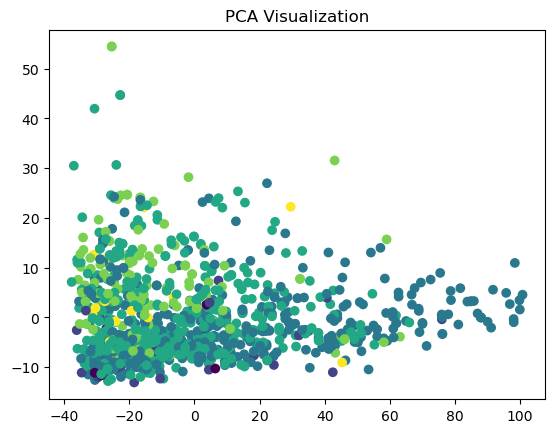

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(X)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.title("PCA Visualization")
plt.savefig('pca')
plt.show()

### Task 4: Model Evaluation with Selected Features

#### 1. Train a classification model (e.g., Decision Tree or kNN) using all features.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state=42)

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dtc.predict(X_test)

In [31]:
print("Model Evaluation:")
print(classification_report(y_test, y_pred))

Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.64      0.70      0.67       127
           6       0.59      0.58      0.58       134
           7       0.53      0.45      0.49        38
           8       0.25      0.20      0.22         5

    accuracy                           0.59       314
   macro avg       0.33      0.32      0.33       314
weighted avg       0.58      0.59      0.58       314



#### 2. Train the same model using selected features and compare performance.

In [32]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [33]:
dtc.fit(X_train_selected, y_train)
y_pred_selected = dtc.predict(X_test_selected)

#### 3. Evaluate models using:

Accuracy, Precision, Recall, and F1-score Feature importance analysis

In [34]:
print("Model Evaluation (Selected Features):")
print(classification_report(y_test, y_pred_selected))

Model Evaluation (Selected Features):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.12      0.12         8
           5       0.73      0.65      0.69       127
           6       0.57      0.59      0.58       134
           7       0.41      0.47      0.44        38
           8       0.22      0.40      0.29         5

    accuracy                           0.58       314
   macro avg       0.34      0.37      0.35       314
weighted avg       0.59      0.58      0.59       314

